In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# lấy dữ liệu
import yfinance as yf
df = yf.download('AAPL', start = '2020-01-01')
#df

[*********************100%%**********************]  1 of 1 completed


In [3]:
predict_size = 2
learn_size = predict_size*2

In [4]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf = predict_size , random_state=42)


In [5]:
#tiền xử lý dữ liệu
#features = df[['Open', 'High', 'Low', 'Volume']]
#target = df['Close']

#đầu vào là một chuỗi ngày và đầu ra là một nhãn
features = []
target = []


for i in range (learn_size, len(df)-predict_size):
    features.append(df['Close'][i-learn_size:i])
    target.append(df['Close'][i+predict_size])

features = np.array(features)
target = np.array(target)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
model.fit(x_train,y_train)

predictions = model.predict(x_test)

print(model.score(x_test,y_test))

C:\Users\a\AppData\Local\Temp\ipykernel_17824\1222658453.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target.append(df['Close'][i+predict_size])


0.6900513710127146


C:\Users\a\AppData\Local\Temp\ipykernel_17824\4146020909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


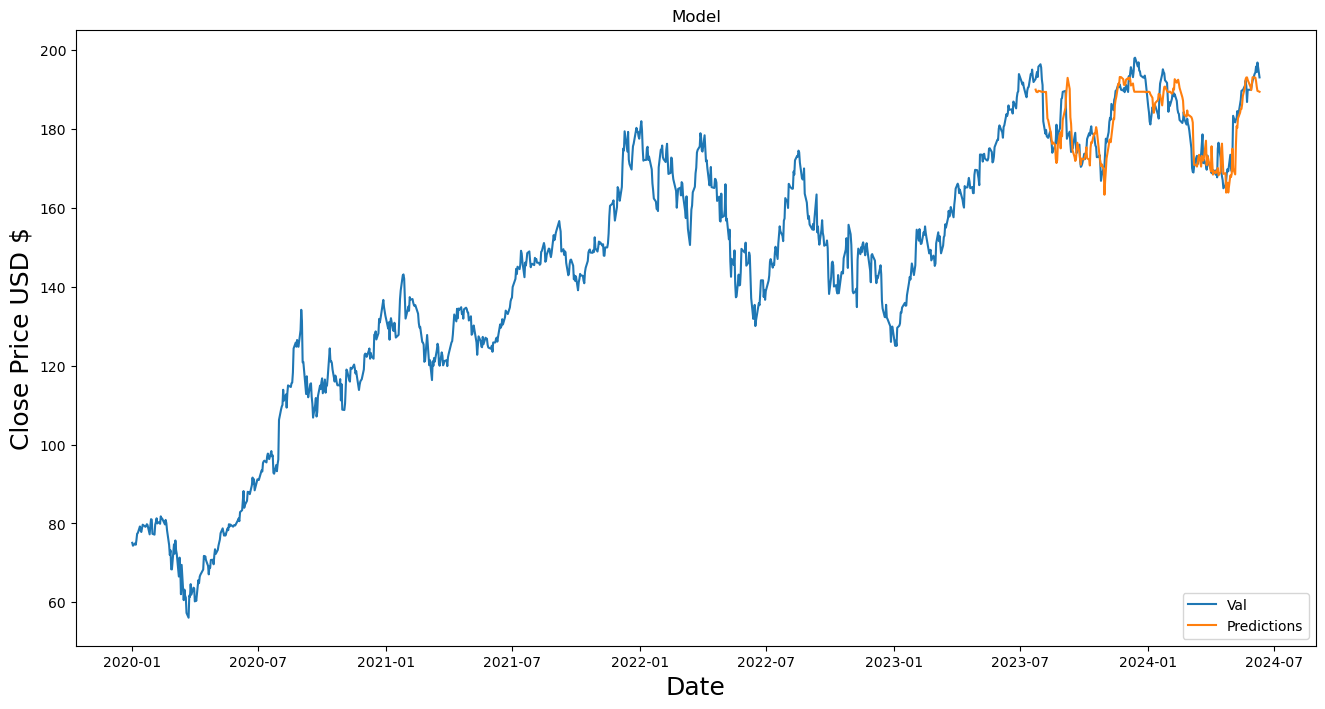

In [6]:
train = df
valid = df[len(x_train)+learn_size+predict_size:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')  
plt.xlabel('Date', fontsize=18 )
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Val', 'Predictions'], loc = 'lower right')
plt.show()